# Logistic Regression for Tumor Classification

This notebook uses logistic regression to predict breast cancer malignancy.

## Background
Logistic regression is a supervised learning algorithm used to model the probability that a given input belongs to a particular class. 
In this case, we use it to predict whether a tumor is malignant or benign based on cell characteristics. 
Mathematically, logistic regression models the log-odds as a linear function:
    log(p / (1 - p)) = w0 + w1*x1 + w2*x2 + ... + wn*xn
where p is the probability of the tumor being malignant.
The sigmoid function then squashes the output into the range [0, 1].

## Data
We use the Breast Cancer dataset from Kaggle, which contains features like mean radius, texture, perimeter, and others extracted from digitized images of breast mass cell nuclei. 
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

## Advantages
- simple and interpretable
- outputs probabilities for classification
- efficient for linearly separable data

## Disadvantages
- poor performance if data is not linearly separable
- sensitive to outliers

## Function
This workbook loads the data, applies logistic regression, evaluates accuracy, and visualizes the results. The output is a binary prediction: benign (0) or malignant (1).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
# load data
df = pd.read_csv("breast-cancer.csv")
df.head()

# drop id and unnamed columns if they exist
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(columns=['id'], errors='ignore')

# convert diagnosis to binary (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [22]:
# separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# create model and fit it
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# predict on test data
y_pred = logreg.predict(X_test)

# check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


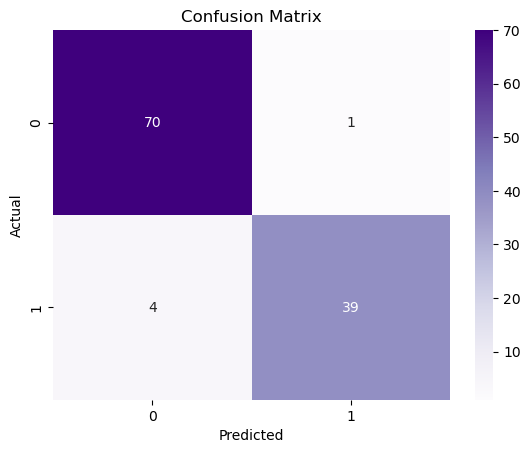

In [24]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



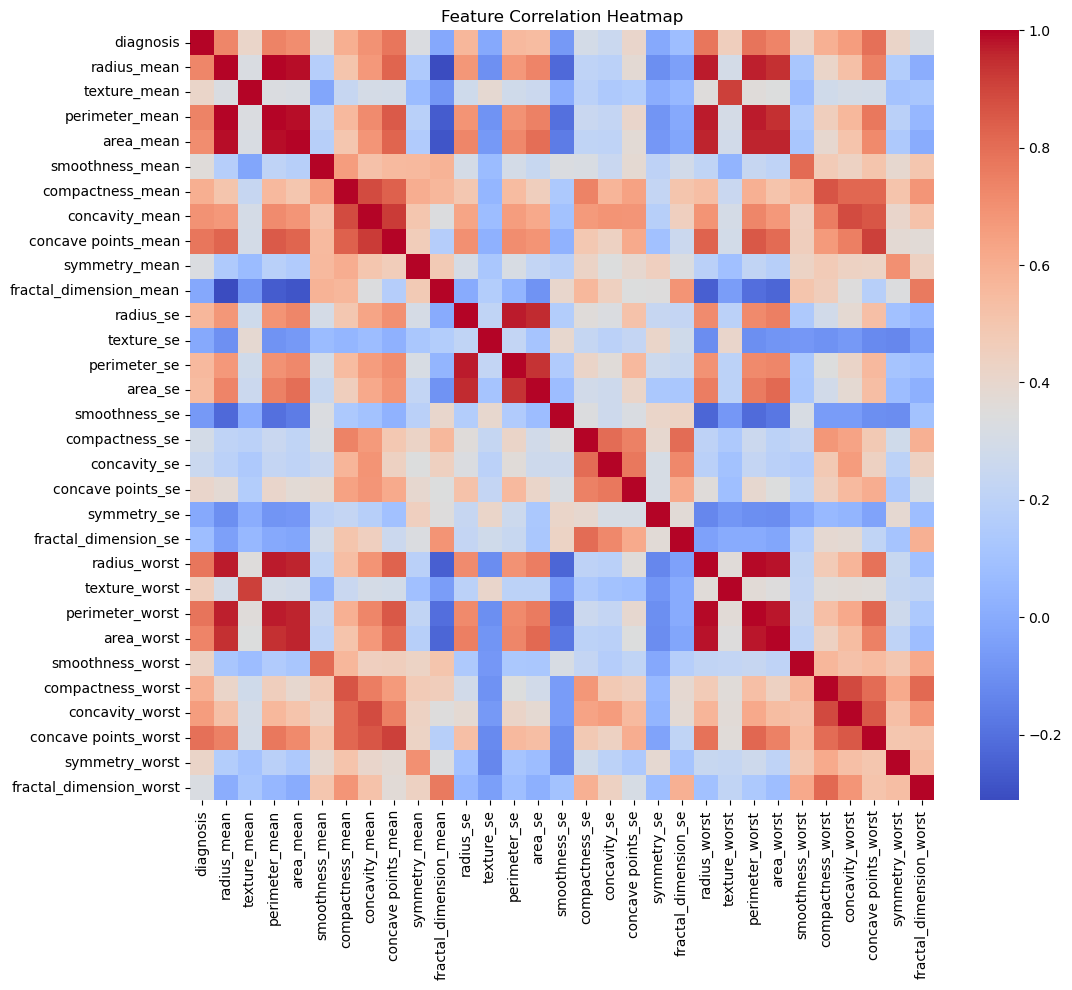

In [26]:
# correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

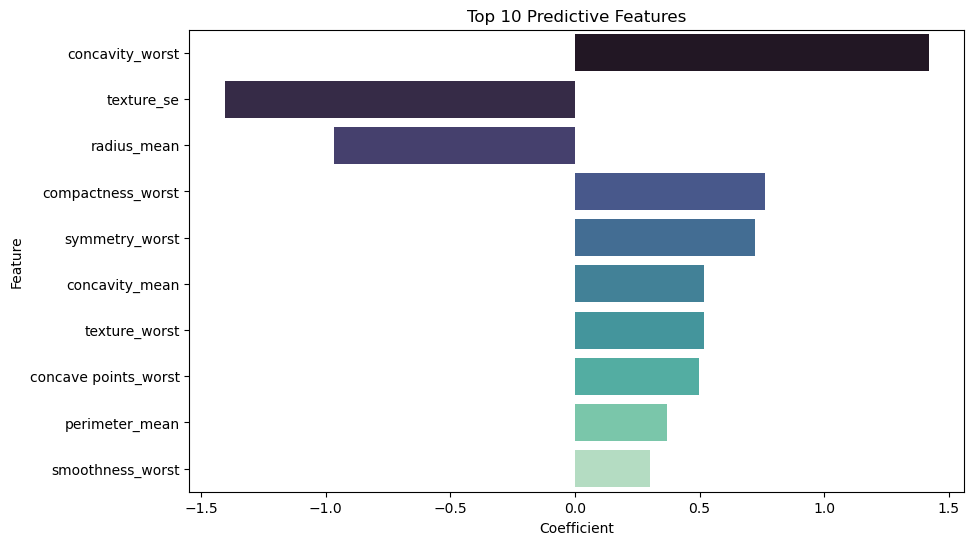

In [27]:
# plot top coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', palette='mako')
plt.title('Top 10 Predictive Features')
plt.show()

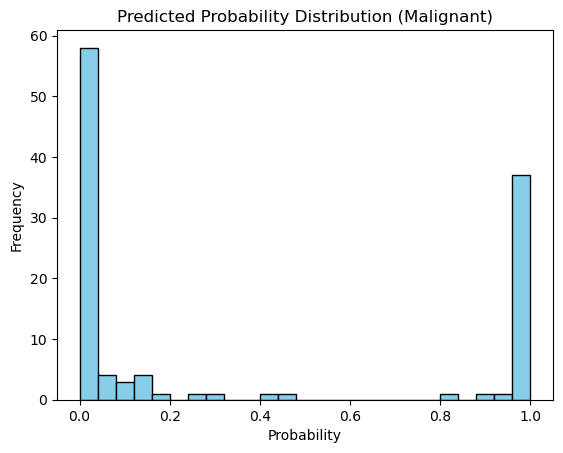

In [28]:
# plot histogram of predicted probabilities
probs = logreg.predict_proba(X_test)[:, 1]  # get probs for class 1
plt.hist(probs, bins=25, color='skyblue', edgecolor='k')
plt.title('Predicted Probability Distribution (Malignant)')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()



---

**Results**
- Logistic regression shows high classification accuracy of 0.956 on test data.
- Confusion matrix shows most predictions were correct, with few false positives/negatives. 
- Certain features (like radius_mean and texture_mean) contributed heavily to model decisions.
- The model successfully divides the data points into two probabilistic outcomes, benign (0.0) or malignant (1.0). About 60% are benign, 40% malignant, and only a few cases are hard to decipher, hovering around 0.5. 

**Conclusion**
- Logistic regression is a solid baseline model for this classification problem. 
- Although it’s linear, it performs well due to the clear separability of the features. 
- Future work could involve exploring nonlinear models (e.g. decision trees, SVMs) or performing dimensionality reduction to enhance performance or interpretability.

---
